In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../csv_files/final_table_all_reports.csv")

In [3]:
non_ventilation = df[
    (df["cause_primary"] != "poor ventilation") &
    (df["cause_secondary"] != "poor ventilation")
]


In [4]:
ventilation = df[
    (df["cause_primary"] == "poor ventilation") |
    (df["cause_secondary"] == "poor ventilation")
]


In [6]:
non_ventilation

,property_type,wall_type,age,issue_type,orientation,ventilation,window_type,occupancy,drying_clothes,main_issue_location,secondary_issue_locations,filename,cause,property_type_categorised,ventilation_categorised,window_type_categorised,cause_primary,cause_secondary
8,one-bedroom ground floor flat,cavity,summer of 2024,both,not mentioned,extractors,not mentioned,1 adult,not mentioned,not mentioned,not mentioned,0072_RH10.pdf,residual construction moisture,ground floor flat,extract ventilation,not mentioned,residual construction moisture,none
9,one-bedroom ground floor flat,cavity,summer of 2024,both,not mentioned,extractors,not mentioned,1 adult,not mentioned,not mentioned,not mentioned,0207_RH10.pdf,residual construction moisture,ground floor flat,extract ventilation,not mentioned,residual construction moisture,none
11,ground floor flat,cavity,not mentioned,mould,not mentioned,trickle vents and extraction units,not mentioned,not mentioned,not mentioned,Bedroom 1,Bedroom 2,0039_LU3.pdf,furniture blocking airflow causing cold spots,ground floor flat,extract ventilation,not mentioned,lifestyle factors,none
12,ground floor flat,cavity,not mentioned,mould,not mentioned,trickle vents and extraction units,not mentioned,not mentioned,not mentioned,Bedroom 1,Bedroom 2,0162_LU3.pdf,furniture blocking airflow causing cold spots,ground floor flat,extract ventilation,not mentioned,lifestyle factors,none
13,two bedroomed ground floor flat,cavity,not mentioned,both,not mentioned,"background trickle vents, forced extraction de...",not mentioned,not mentioned,yes,Bedroom 2,Bathroom,0012_CR8.pdf,structural dampness from inadequate membrane i...,ground floor flat,extract ventilation,not mentioned,external moisture penetration,none
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,maisonette,cavity,late 1800s,damp,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned,Kitchen,hallway,0143_E8.pdf,leak from kitchen waste pipe,other,not mentioned,not mentioned,internal leaks/plumbing,none
317,basement flat in a terrace town house,solid,not mentioned,both,not mentioned,"sash windows, extractor unit in shower room",sash,not mentioned,not mentioned,"lounge, bedroom",not mentioned,0128_CT6.pdf,ongoing moisture from plumbing issues,flat,extract ventilation,other,internal leaks/plumbing,none
318,"two story, two-bedroom dwelling",solid,1800s,both,not mentioned,"ceiling mounted extractor unit in bathroom, wi...",uPVC,1 adult with occasional visits from an adult c...,not mentioned,first floor store room,first floor bedroom,0287_TQ2.pdf,water ingress affecting structural walls,not mentioned,extract ventilation,uPVC,external moisture penetration,none
319,large end of terrace dwelling,cavity,not mentioned,damp,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned,Bedroom 3,"Bedroom 1, Bedroom 2",0165_ME14.pdf,cold areas due to inadequate insulation,semi-detached/end terrace,not mentioned,not mentioned,insufficient heating,none


In [7]:
ventilation["ventilation_categorised"].value_counts(normalize=True)

ventilation_categorised
extract ventilation                  0.666667
natural ventilation                  0.199005
not mentioned                        0.059701
PIV                                  0.029851
continuous mechanical ventilation    0.024876
MVHR                                 0.014925
other                                0.004975
Name: proportion, dtype: float64

In [8]:
non_ventilation["ventilation_categorised"].value_counts(normalize=True)

ventilation_categorised
not mentioned                        0.426230
extract ventilation                  0.385246
natural ventilation                  0.163934
PIV                                  0.016393
continuous mechanical ventilation    0.008197
Name: proportion, dtype: float64

In [9]:


pd.crosstab(df["cause_primary"], df["ventilation_categorised"], normalize="index")


ventilation_categorised,MVHR,PIV,continuous mechanical ventilation,extract ventilation,natural ventilation,not mentioned,other
cause_primary,,,,,,,
external moisture penetration,0.000000,0.016949,0.016949,0.406780,0.169492,0.389831,0.000000
insufficient heating,0.000000,0.000000,0.000000,0.600000,0.200000,0.200000,0.000000
internal leaks/plumbing,0.000000,0.038462,0.000000,0.230769,0.076923,0.653846,0.000000
lifestyle factors,0.000000,0.000000,0.000000,0.692308,0.153846,0.153846,0.000000
other/unclear,0.000000,0.000000,0.000000,0.375000,0.000000,0.625000,0.000000
poor ventilation,0.015385,0.030769,0.025641,0.666667,0.200000,0.056410,0.005128
residual construction moisture,0.000000,0.000000,0.000000,0.666667,0.000000,0.333333,0.000000
rising damp,0.000000,0.000000,0.000000,0.285714,0.428571,0.285714,0.000000


# 1. Main Causes

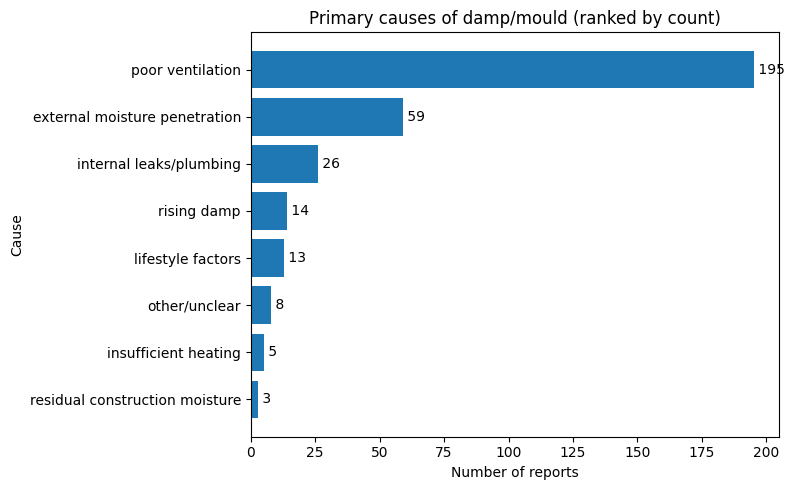

In [9]:


# Pick the column to rank
col = "cause_primary"

# Counts (sorted)
counts = df[col].value_counts().sort_values(ascending=True)

# Plot: ranked horizontal bar chart (counts)
plt.figure(figsize=(8, 5))
plt.barh(counts.index, counts.values)
plt.title("Primary causes of damp/mould (ranked by count)")
plt.xlabel("Number of reports")
plt.ylabel("Cause")
for i, v in enumerate(counts.values):
    plt.text(v, i, f" {v}", va="center")  # annotate counts
plt.tight_layout()
plt.show()


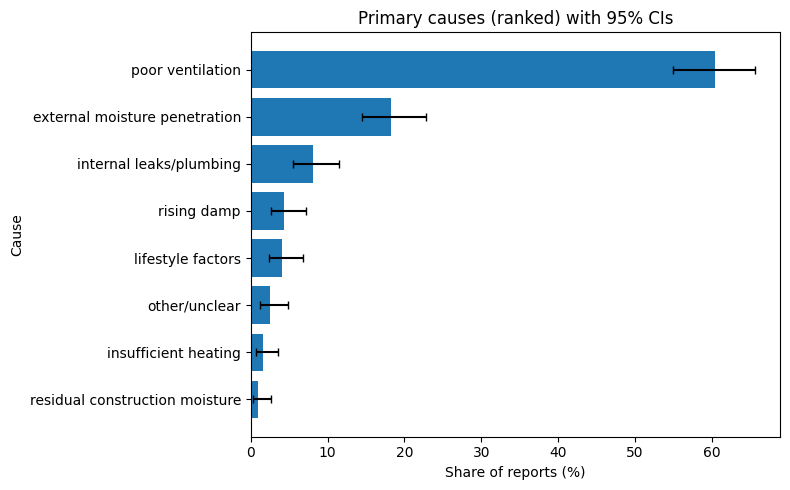

In [11]:
import numpy as np

n = len(df)

def wilson_ci(k, n, z=1.96):
    p = k / n
    z2 = z**2
    denom = 1 + z2/n
    center = (p + z2/(2*n)) / denom
    half = (z * np.sqrt((p*(1-p)/n) + (z2/(4*n**2)))) / denom
    return (center - half, center + half)

k = counts.values
centers = (k / n) * 100
ci = np.array([wilson_ci(ki, n) for ki in k]) * 100  # in %
err_lower = centers - ci[:,0]
err_upper = ci[:,1] - centers

plt.figure(figsize=(8, 5))
plt.barh(counts.index, centers, xerr=[err_lower, err_upper], capsize=3)
plt.title("Primary causes (ranked) with 95% CIs")
plt.xlabel("Share of reports (%)")
plt.ylabel("Cause")
plt.tight_layout()
plt.show()


In [13]:
# Number of reports where each cause is mentioned as either primary or secondary cause:
import pandas as pd

# Count for primary causes
primary_counts = df['cause_primary'].value_counts().rename("primary")

# Count for secondary causes
secondary_counts = df['cause_secondary'].value_counts().rename("secondary")

# Combine into one table
cause_table = pd.concat([primary_counts, secondary_counts], axis=1).fillna(0)

# Add total column
cause_table["total"] = cause_table["primary"] + cause_table["secondary"]

# Make sure counts are integers
cause_table = cause_table.astype(int)

print(cause_table)


                                primary  secondary  total
poor ventilation                    195          6    201
external moisture penetration        59         12     71
internal leaks/plumbing              26          3     29
rising damp                          14          3     17
lifestyle factors                    13         26     39
other/unclear                         8          8     16
insufficient heating                  5         10     15
residual construction moisture        3          0      3
none                                  0        255    255


# 2. Property Types

Here we see a heatmap showing the relation between the type of property and the cause of the issue.

In [14]:
print(df["property_type_categorised"].value_counts())

property_type_categorised
semi-detached/end terrace    92
ground floor flat            87
flat                         71
other                        28
detached                     23
mid terrace                  19
not mentioned                 3
Name: count, dtype: int64


In [15]:
ct = pd.crosstab(
    df["property_type_categorised"],
    df["cause_primary"],
    margins=True,  # adds row/col totals
    margins_name="Total"
)

ct_pct = (ct.div(ct.sum(axis=1), axis=0) * 100).round(1)
ct_pct["Row_Total"] = ct.sum(axis=1)  # add totals

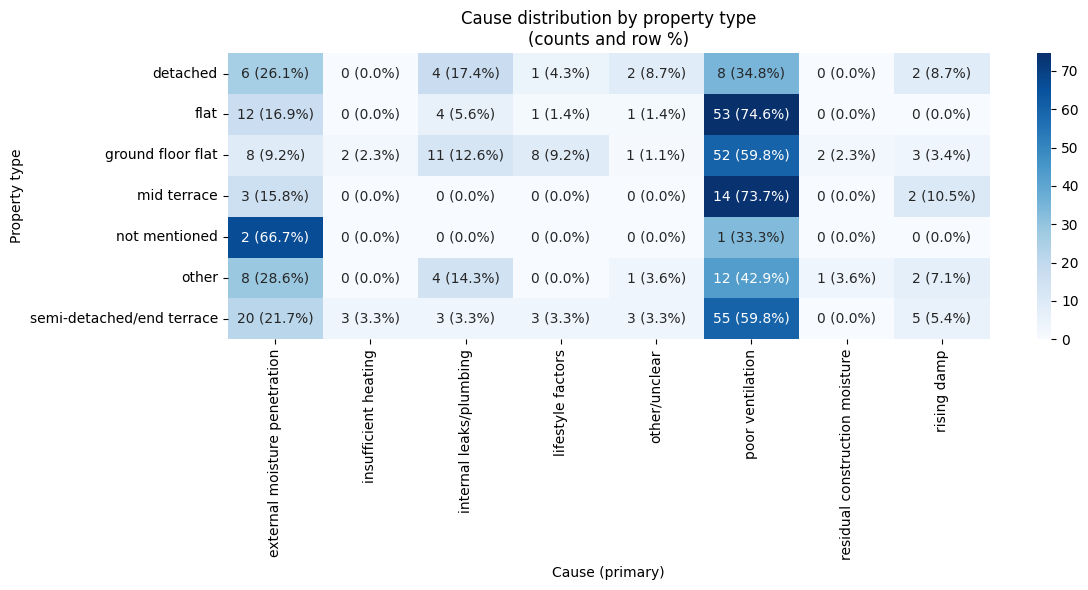

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

ct_counts = pd.crosstab(df["property_type_categorised"], df["cause_primary"])
ct_pct = (ct_counts.div(ct_counts.sum(axis=1), axis=0) * 100).round(1)

plt.figure(figsize=(12,6))
sns.heatmap(ct_pct, annot=ct_counts.astype(str) + " (" + ct_pct.astype(str) + "%)", fmt="", cmap="Blues")
plt.title("Cause distribution by property type\n(counts and row %)")
plt.ylabel("Property type")
plt.xlabel("Cause (primary)")
plt.tight_layout()
plt.show()


An example of an insight we can gain is - flats (non-ground floor) have poor ventilation being the primary cause 100% of the time (21 total)
However in semi-detached/end terrace properties this is only 74.2% (23 instances) so usually has a wider range of causes. ground floor flats only have 65% of the instances being poor ventilation.

This is just an example, need way more data to provide anything meaningful

# 3. Ventilation system effectiveness

#### Crosstab of causes and ventilation category:

In [17]:
ct = pd.crosstab(df["ventilation_categorised"], df["cause_primary"])
ct_pct = (ct.div(ct.sum(axis=1), axis=0) * 100).round(1)
display(ct_pct)


cause_primary,external moisture penetration,insufficient heating,internal leaks/plumbing,lifestyle factors,other/unclear,poor ventilation,residual construction moisture,rising damp
ventilation_categorised,,,,,,,,
MVHR,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0
PIV,12.5,0.0,12.5,0.0,0.0,75.0,0.0,0.0
continuous mechanical ventilation,16.7,0.0,0.0,0.0,0.0,83.3,0.0,0.0
extract ventilation,13.3,1.7,3.3,5.0,1.7,71.8,1.1,2.2
natural ventilation,16.7,1.7,3.3,3.3,0.0,65.0,0.0,10.0
not mentioned,35.9,1.6,26.6,3.1,7.8,17.2,1.6,6.2
other,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0


In [18]:
display(ct)

cause_primary,external moisture penetration,insufficient heating,internal leaks/plumbing,lifestyle factors,other/unclear,poor ventilation,residual construction moisture,rising damp
ventilation_categorised,,,,,,,,
MVHR,0,0,0,0,0,3,0,0
PIV,1,0,1,0,0,6,0,0
continuous mechanical ventilation,1,0,0,0,0,5,0,0
extract ventilation,24,3,6,9,3,130,2,4
natural ventilation,10,1,2,2,0,39,0,6
not mentioned,23,1,17,2,5,11,1,4
other,0,0,0,0,0,1,0,0


#### Risk of 'poor ventilation' by category type:

In [17]:
grp = df.groupby("ventilation_categorised")
n = grp.size()
k = grp["cause_primary"].apply(lambda s: (s == "poor ventilation").sum())
risk = (k / n * 100).round(1)

pd.DataFrame({"n": n, "poor_vent_count": k, "poor_vent_%": risk})


,n,poor_vent_count,poor_vent_%
ventilation_categorised,,,
MVHR,3,3,100.0
PIV,8,6,75.0
continuous mechanical ventilation,6,5,83.3
extract ventilation,181,130,71.8
natural ventilation,60,39,65.0
not mentioned,64,11,17.2
other,1,1,100.0


#### Relative risk:

In [18]:
baseline = "natural ventilation"
rr = (risk / risk.loc[baseline]).round(2)
print(rr)


ventilation_categorised
MVHR                                 1.54
PIV                                  1.15
continuous mechanical ventilation    1.28
extract ventilation                  1.10
natural ventilation                  1.00
not mentioned                        0.26
other                                1.54
dtype: float64


# 4. Secondary contributors

In [19]:
print(df["cause_primary"].value_counts())
print("")
print(df["cause_secondary"].value_counts())

cause_primary
poor ventilation                  195
external moisture penetration      59
internal leaks/plumbing            26
rising damp                        14
lifestyle factors                  13
other/unclear                       8
insufficient heating                5
residual construction moisture      3
Name: count, dtype: int64

cause_secondary
none                             255
lifestyle factors                 26
external moisture penetration     12
insufficient heating              10
other/unclear                      8
poor ventilation                   6
rising damp                        3
internal leaks/plumbing            3
Name: count, dtype: int64


In [20]:
pd.crosstab(df["cause_primary"], df["cause_secondary"])


cause_secondary,external moisture penetration,insufficient heating,internal leaks/plumbing,lifestyle factors,none,other/unclear,poor ventilation,rising damp
cause_primary,,,,,,,,
external moisture penetration,0,0,0,0,56,1,1,1
insufficient heating,0,0,0,1,2,0,2,0
internal leaks/plumbing,1,0,0,0,23,0,2,0
lifestyle factors,0,1,0,0,11,0,1,0
other/unclear,0,0,0,0,8,0,0,0
poor ventilation,10,9,3,25,139,7,0,2
residual construction moisture,0,0,0,0,3,0,0,0
rising damp,1,0,0,0,13,0,0,0


In [21]:
import pandas as pd
from itertools import combinations

# list of all categories
categories = sorted(set(df["cause_primary"]) | set(df["cause_secondary"]))

# init co-occurrence table
co_matrix = pd.DataFrame(0, index=categories, columns=categories)

for _, row in df.iterrows():
    causes = {row["cause_primary"]}
    if row["cause_secondary"] != "none":
        causes.add(row["cause_secondary"])
    for a, b in combinations(causes, 2):
        co_matrix.loc[a, b] += 1
        co_matrix.loc[b, a] += 1

display(co_matrix)


,external moisture penetration,insufficient heating,internal leaks/plumbing,lifestyle factors,none,other/unclear,poor ventilation,residual construction moisture,rising damp
external moisture penetration,0,0,1,0,0,1,11,0,2
insufficient heating,0,0,0,2,0,0,11,0,0
internal leaks/plumbing,1,0,0,0,0,0,5,0,0
lifestyle factors,0,2,0,0,0,0,26,0,0
none,0,0,0,0,0,0,0,0,0
other/unclear,1,0,0,0,0,0,7,0,0
poor ventilation,11,11,5,26,0,7,0,0,2
residual construction moisture,0,0,0,0,0,0,0,0,0
rising damp,2,0,0,0,0,0,2,0,0


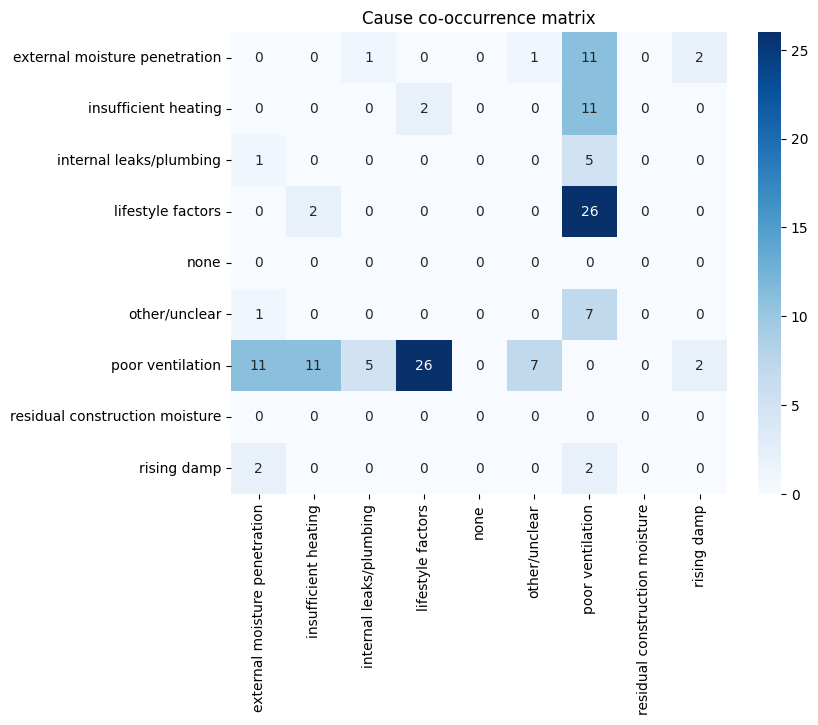

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(co_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Cause co-occurrence matrix")
plt.show()


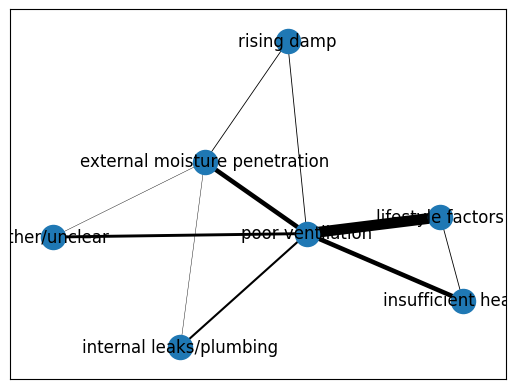

In [24]:
import networkx as nx

G = nx.Graph()
for a in categories:
    for b in categories:
        if co_matrix.loc[a, b] > 0:
            G.add_edge(a, b, weight=co_matrix.loc[a, b])

nx.draw_networkx(G, with_labels=True, width=[d['weight']*0.3 for _,_,d in G.edges(data=True)])


# 5. Window types

In [25]:
df["window_type_categorised"].value_counts()


window_type_categorised
not mentioned      172
uPVC               136
other                7
timber               4
uPVC and timber      2
aluminium            2
Name: count, dtype: int64

In [26]:
ct = pd.crosstab(df["window_type_categorised"], df["cause_primary"])
ct_pct = (ct.div(ct.sum(axis=1), axis=0) * 100).round(1)

display(ct)
display(ct_pct)


cause_primary,external moisture penetration,insufficient heating,internal leaks/plumbing,lifestyle factors,other/unclear,poor ventilation,residual construction moisture,rising damp
window_type_categorised,,,,,,,,
aluminium,0,0,0,0,0,2,0,0
not mentioned,37,2,21,8,7,89,3,5
other,2,0,1,0,0,3,0,1
timber,1,0,1,0,0,1,0,1
uPVC,19,3,3,5,1,99,0,6
uPVC and timber,0,0,0,0,0,1,0,1


cause_primary,external moisture penetration,insufficient heating,internal leaks/plumbing,lifestyle factors,other/unclear,poor ventilation,residual construction moisture,rising damp
window_type_categorised,,,,,,,,
aluminium,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0
not mentioned,21.5,1.2,12.2,4.7,4.1,51.7,1.7,2.9
other,28.6,0.0,14.3,0.0,0.0,42.9,0.0,14.3
timber,25.0,0.0,25.0,0.0,0.0,25.0,0.0,25.0
uPVC,14.0,2.2,2.2,3.7,0.7,72.8,0.0,4.4
uPVC and timber,0.0,0.0,0.0,0.0,0.0,50.0,0.0,50.0
